# Density estimation on the iris flower dataset

The Iris flower dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

In [1]:
import numpy as np
import diagonal_gaussian_parametric_density_estimator
import parzen_density_estimator
import matplotlib.pyplot as plt

## 1D densities

Estimate the density of one feature (sepal length) of one type of iris flower.

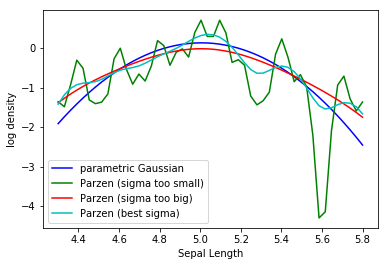

In [8]:
data = np.loadtxt('iris.txt')

#take only class 1 and only one feature (Sepal Length)
data = data[0:50,0]

# x axis
min_x, max_x = min(data), max(data)
x = np.array(np.linspace(min_x, max_x))

# use a diagonal Gaussian parametric density estimator
model_gaussian = diagonal_gaussian_parametric_density_estimator.Diag_gaussian()
model_gaussian.train(data)
y_b = [model_gaussian.predict(np.array([e])) for e in x]
plt.plot(x, y_b, 'b', label='parametric Gaussian')

# use parzen density estimator with a sigma too small
# This sigma is too small because it overfits the training dataset.
model_small = parzen_density_estimator.Kernel_density_estimator(h=0.001)
model_small.train(data)
y_c = [model_small.predict(np.array([e])) for e in x]
plt.plot(x,y_c,'g', label='Parzen (sigma too small)')

# use parzen density estimator with a sigma too big
# This sigma is too big because it underfits the datasets.
model_big = parzen_density_estimator.Kernel_density_estimator(h=0.05)
model_big.train(data)
y_d = [model_big.predict(np.array([e])) for e in x]
plt.plot(x,y_d,'r', label='Parzen (sigma too big)')

# use parzen density estimator with a good sigma
model_good = parzen_density_estimator.Kernel_density_estimator(h=0.007)
model_good.train(data)
y_e = [model_good.predict(np.array([e])) for e in x]
plt.plot(x,y_e,'c', label='Parzen (best sigma)')

plt.ylabel('log density')
plt.xlabel('Sepal Length')
plt.legend(loc='best')
plt.show()

## 2D densities
 Estimate the densities of 2 features.

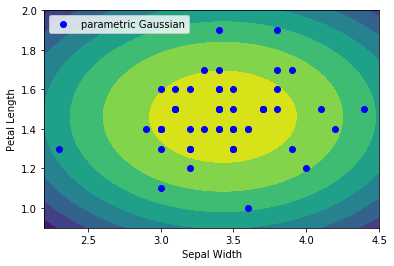

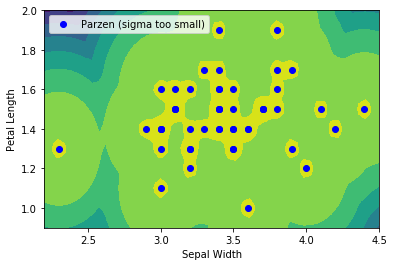

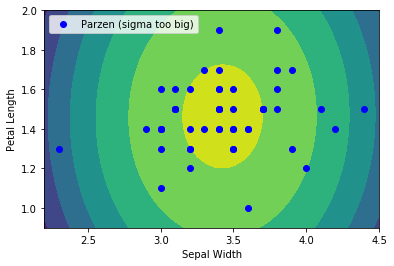

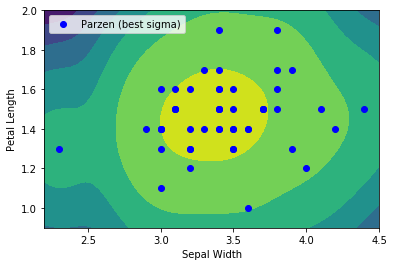

In [12]:
data = np.loadtxt('iris.txt')

#take only class 1 and two features (Sepal Width and Petal length)
data = data[0:50, 1:3]
data_x = data[:, 0]
data_y = data[:, 1]

# create grid
min_x, max_x = min(data_x), max(data_x)
min_y, max_y = min(data_y), max(data_y)
x = np.linspace(min_x - 0.1, max_x + 0.1,50)
y = np.linspace(min_y - 0.1, max_y + 0.1 ,50)
XY = np.array(np.meshgrid(x,y))

def grid_densities(XY, model):
    """
    :param XY: grid of values where we want the densities
    :param model: model used to calculate the densities
    :return: densities on the grid
    """
    Z = np.zeros((50, 50))
    for i in range(XY.shape[1]):
        for j in range(XY.shape[2]):
            Z[i, j] = model.predict(np.array([XY[0, i, j], XY[1, i, j]]))
    return Z

def make_and_show_plot(x,y,Z):
    """
    :param x: vector length n
    :param y: vector length m
    :param Z: matrix nxm
    make and show the contourf plot
    """
    plt.contourf(x, y, Z)
    plt.ylabel('Petal Length')
    plt.xlabel('Sepal Width')
    plt.legend(loc='upper left')
    plt.show()

# use a diagonal Gaussian parametric density estimator
model_gauss = diagonal_gaussian_parametric_density_estimator.Diag_gaussian()
model_gauss.train(data)
plt.plot(data_x,data_y, 'bo', label='parametric Gaussian')
Z_gauss = grid_densities(XY,model_gauss)
make_and_show_plot(x,y,Z_gauss)

# use parzen density estimator with a sigma too small
model_small = parzen_density_estimator.Kernel_density_estimator(h=0.001)
model_small.train(data)
plt.plot(data_x,data_y, 'bo', label='Parzen (sigma too small)')
Z_small = grid_densities(XY,model_small)
make_and_show_plot(x,y,Z_small)

# use parzen density estimator with a sigma too big
model_big = parzen_density_estimator.Kernel_density_estimator(h=1)
model_big.train(data)
plt.plot(data_x,data_y, 'bo', label='Parzen (sigma too big)')
Z_big = grid_densities(XY,model_big)
make_and_show_plot(x,y,Z_big)

# use parzen density estimator with a good sigma
model_good = parzen_density_estimator.Kernel_density_estimator(h=0.04)
model_good.train(data)
plt.plot(data_x,data_y, 'bo', label='Parzen (best sigma)')
Z_good = grid_densities(XY,model_good)
make_and_show_plot(x,y,Z_good)